In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn

In [2]:
n = 1_000_000
p = 0.7
μ1, μ2, μ3 = 0.2, 0.8, 0.4
σ1, σ2, σ3 = 0.1, 0.05, 0.2

In [9]:
S = 0.0
for i in range(n):
    X1 = np.exp(μ1 + σ1 * randn())
    X2 = np.exp(μ2 + σ2 * randn())
    X3 = np.exp(μ3 + σ3 * randn())
    S += (X1 + X2 + X3)**p

print(f"The mean is {round(S/n,5)}")

The mean is 3.07379


In [ ]:
def compute_mean_vectorized(n=1_000_000):
    X_1 = np.exp(μ1 + σ1 * randn(n)) # vectorizing by randomly generating all numbers at once
    X_2 = np.exp(μ2 + σ2 * randn(n))
    X_3 = np.exp(μ3 + σ3 * randn(n))
    S = (X_1 + X_2 + X_3)**p
    return S.mean()

compute_mean_vectorized()

np.float64(3.074157345130323)

In [2]:
μ = 1.0
σ = 0.1
K = 1
n = 10
β = 0.95
M = 10_000_000

In [13]:
S = np.exp(μ + σ * randn(M))
return_draws = np.maximum(S-K, 0)
P = β **n * np.mean(return_draws)
print(f"The Monte Carlo option price is approximately {P:.3f}")

The Monte Carlo option price is approximately 1.037


In [3]:
# dynamic model
default_μ  = 0.0001
default_ρ  = 0.1
default_ν  = 0.001
default_S0 = 10
default_h0 = 0
default_K = 100
default_n = 10
default_β = 0.95

In [ ]:
def sim_asset_price_path(μ = default_μ, S0 = default_S0, h0 = default_h0, n = default_n, ρ = default_ρ, ν = default_ν):
    s = np.empty(n+1)
    s[0] = np.log(S0)

    h = h0
    for t in range(n):
        s[t+1] = s[t] + μ + np.exp(h) * randn()
        h = ρ * h + ν * randn()

    return np.exp(s)

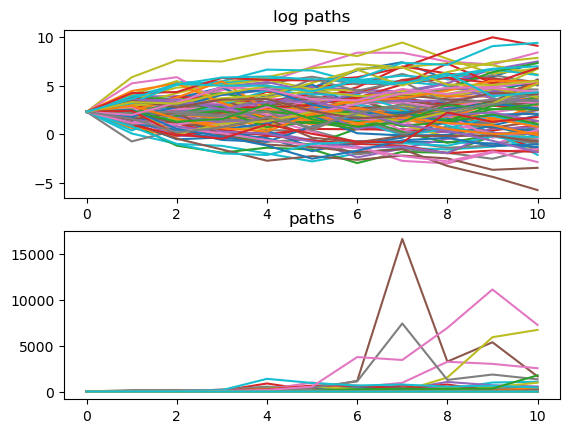

In [21]:
fig, axes = plt.subplots(2,1)
titles = "log paths", "paths"

transforms = np.log, lambda x: x
for ax, transform, title in zip(axes, transforms, titles):
    for i in range(100):
        path = sim_asset_price_path()
        ax.plot(transform(path))
    ax.set_title(title)

plt.show()

In [20]:
def compute_call_price(β=default_β,
                       μ=default_μ,
                       S0=default_S0,
                       h0=default_h0,
                       K=default_K,
                       n=default_n,
                       ρ=default_ρ,
                       ν=default_ν,
                       M=10_000):
    current_sum = 0.0

    for m in range(M):
        s = np.log(S0)
        h = h0
        for t in range(n):
            s = s + μ + np.exp(h) * randn()
            h = ρ * h + ν * randn()
        current_sum += np.maximum(np.exp(s) - K, 0)

    return β**n * current_sum / M

In [49]:
%%time
print(compute_call_price())

567.8756119764613
CPU times: total: 219 ms
Wall time: 253 ms


# Exercise 21.1

We would like to increase $M$ in the code above to make the calculation more accurate.

But this is problematic because Python loops are slow.

Your task is to write a faster version of this code using NumPy.

In [ ]:
default_μ = 0.0001
default_ρ = 0.1
default_ν = 0.001
default_S0 = 10
default_h0 = 0
default_K = 100
default_n = 10
default_β = 0.95

def np_compute_call_price(β=default_β,
                       μ=default_μ,
                       S0=default_S0,
                       h0=default_h0,
                       K=default_K,
                       n=default_n,
                       ρ=default_ρ,
                       ν=default_ν,
                       M=10_000):
    series = np.zeros((M,n)) # we're doing all M simulations simulataneously
    h = np.zeros((M,n))
    noise = randn(M,n)

    # intial values
    series[:, 0] = np.log(S0)
    h[:, 0] = h0

    for t in range(1,n):
        h[:, t] = ρ * h[:, t-1] + ν * noise[:, t]
        series[:, t] = series[:, t-1] + μ + np.exp(h[:, t]) * noise[:, t]

    final_prices = np.exp(series[:, -1])
    payoffs = np.maximum(final_prices - K, 0)

    return β**n * np.mean(payoffs)

    

In [117]:
print(np_compute_call_price())

411.6654256106895


In [ ]:
print("Timing np_compute_call_price:")
%timeit np_compute_call_price(M = 10**6)

print("\nTiming compute_call_price:")
%timeit compute_call_price(M = 10**6)

# ------------------------------------------------------ results ----------------------------------------------------- #
"""Timing np_compute_call_price:
610 ms ± 6.89 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Timing compute_call_price:
16.2 s ± 32.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)"""

Timing np_compute_call_price:
610 ms ± 6.89 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Timing compute_call_price:
16.2 s ± 32.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
